In [1]:
%matplotlib inline


# 粗略的周期性发现


发现动物种群进化的时期




In [19]:
import numpy as np
data = np.loadtxt('populations.txt')
years = data[:, 0]
populations = data[:, 1:]
print(years.shape)
print(data)
populations

(21,)
[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.],
       [20600., 41700., 39800.],
       [18100., 19000., 38600.],
       [21400., 13000., 42300.],
       [22000.,  8300., 44500.],
       [25400.,  9100., 42100.],
       [27100.,  7400., 46000.],
       [40300.,  8000., 46800.],
       [57000., 12300., 43800.],
       [76600., 19500., 40900.],
       [52300., 45700., 39400.],
       [19500., 51100., 39000.],
       [11200., 29700., 36700.],
       [ 7600., 15800., 41800.],
       [14600.,  9700., 43300.],
       [16200., 10100., 41300.],
       [24700.,  8600., 47300.]])

Plot the data
###########################################################



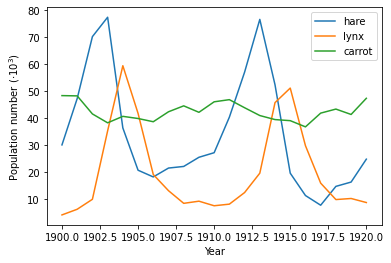

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

Plot its periods
###########################################################



<ipython-input-32-05c18c307bda>:6: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
21
21


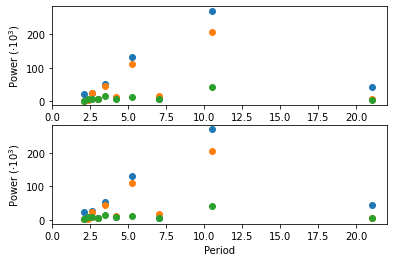

In [32]:
from scipy import fftpack

ft_populations = fftpack.fft(populations, axis=0)
# frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
frequencies = fftpack.fftfreq(populations.shape[0], 1.0)
periods = 1 / frequencies
print(years)
print(populations.shape[0])
print(years.shape[0])

plt.figure()
plt.subplot(2,1,1)
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.subplot(2,1,2)
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

There's probably a period of around 10 years (obvious from the
plot), but for this crude a method, there's not enough data to say
much more.

